In [65]:
import numpy as np
import pandas as pd
import csv
import matplotlib as plt

In [67]:
df1 = pd.read_csv("../data_ADNR/test_metrics.csv")
df2 = pd.read_csv("../data_Original/test_metrics.csv")
df1.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
0,DeepRM_AD_NR,5.518519,149,50,1,NaN
1,SJF,4.785714,67,50,1,NaN
2,DeepRM_AD_NR,1.937500,31,50,1,NaN
3,SJF,4.045455,89,50,1,NaN
4,DeepRM_AD_NR,2.500000,60,50,1,NaN


In [68]:
df1["Anomaly rate"].fillna(0.1, inplace=True)
df2["Anomaly rate"].fillna(0.1, inplace=True)
df2.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
0,SJF,3.181818,35,50,1,0.1
1,DeepRM,5.153846,67,50,1,0.1
2,SJF,4.583333,55,50,1,0.1
3,DeepRM,11.666667,105,50,1,0.1
4,SJF,4.909091,54,50,1,0.1


In [69]:
df1 = df1.loc[df1["Test Type"] != "SJF"]
df2 = df2.loc[df2["Test Type"] != "SJF"]
df1.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
0,DeepRM_AD_NR,5.518519,149,50,1,0.1
2,DeepRM_AD_NR,1.937500,31,50,1,0.1
4,DeepRM_AD_NR,2.500000,60,50,1,0.1
6,DeepRM_AD_NR,4.052632,77,50,1,0.1
8,DeepRM_AD_NR,4.166667,50,50,1,0.1


In [4]:
df1_7 = df1[df1['Dist Proba']==0.7]

In [5]:
df2_7 = df2[df2['Dist Proba']==0.7]

In [6]:
df3_7 = df3[df3['Dist Proba']==0.7]

In [7]:
df1_7 = df1_7[~df1_7['Test Type'].str.contains('SJF')]

In [8]:
df2_7 = df2_7[~df2_7['Test Type'].str.contains('SJF')]

In [9]:
df3_7 = df3_7[~df3_7['Test Type'].str.contains('SJF')]

In [10]:
df1_7.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba
2999,DeepRM_ECO,4.076923,106,50,0.7
3001,DeepRM_ECO,2.807692,73,50,0.7
3003,DeepRM_ECO,2.782609,64,50,0.7
3005,DeepRM_ECO,4.240000,106,50,0.7
3007,DeepRM_ECO,4.000000,132,50,0.7


In [16]:
df2_7.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba
2999,DeepRM,4.583333,55,50,0.7
3001,DeepRM,8.000000,128,50,0.7
3003,DeepRM,2.545455,28,50,0.7
3005,DeepRM,10.823529,184,50,0.7
3007,DeepRM,6.866667,103,50,0.7


<module 'matplotlib.pyplot' from '/home/ubuntu/DeepRM_ECO/p2venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

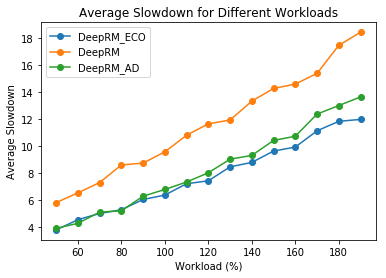

In [12]:
import matplotlib.pyplot as plt

# Assuming 'workload' and 'Average Slowdown' are column names in your DataFrame
workloads1 = df1_7['Workload'].unique()
workloads1.sort()
average_slowdowns1 = [df1_7[df1_7['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

workloads2 = df2_7['Workload'].unique()
workloads2.sort()
average_slowdowns2 = [df2_7[df2_7['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads2]

workloads3 = df3_7['Workload'].unique()
workloads3.sort()
average_slowdowns3 = [df3_7[df3_7['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

plt.plot(workloads1, average_slowdowns1, 'o-', label='DeepRM_ECO')
plt.plot(workloads2, average_slowdowns2, 'o-', label='DeepRM')
plt.plot(workloads2, average_slowdowns3, 'o-', label='DeepRM_AD')

plt.title('Average Slowdown for Different Workloads')
plt.xlabel('Workload (%)')
plt.ylabel('Average Slowdown')

plt.legend()
plt



In [45]:
drad_a1 = pd.read_csv('../anomaly_detected_NR/allocatedJobs.csv')
drad_d1 = pd.read_csv('../anomaly_detected_NR/destroyedJobs.csv')

In [46]:
drad_a1.head()

,iteration,job object,job ID,job Length,job ressource requirement,job enter time,job start time,job finish time,job waiting time,current time
0,1,<environment.Job instance at 0x7efc3ddc6550>,3,22,[5 7],5,5,27,0,5
1,1,<environment.Job instance at 0x7efc3ddc6410>,4,2,[7 1],6,14,16,8,6
2,1,<environment.Job instance at 0x7efc3ddc6870>,6,18,[6 2],12,16,34,4,12
3,1,<environment.Job instance at 0x7efc3ddc67d0>,7,3,[7 3],13,27,30,14,13
4,1,<environment.Job instance at 0x7efc3ddc6960>,8,2,[6 3],14,30,32,16,14


In [47]:
def has_high_resource(row):
    # Check if any resource requirement is above 10
    return np.any(np.array(row['job ressource requirement']) > 10)


In [48]:
def convert_to_list(row):
    # Remove brackets and split on space
    items = row.replace('[', '').replace(']', '').split(' ')
    # Remove any empty strings caused by extra spaces
    items = [item for item in items if item != '']
    # Convert strings to integers
    items = [int(item) for item in items]
    return items

In [49]:
drad_a1['job ressource requirement'] = drad_a1['job ressource requirement'].apply(convert_to_list)

In [50]:
drad_a1['job ressource requirement']

0        [5, 7]
1        [7, 1]
2        [6, 2]
3        [7, 3]
4        [6, 3]
5       [4, 10]
6        [7, 3]
7        [8, 5]
8        [9, 3]
9        [3, 5]
10       [2, 6]
11      [5, 10]
12       [1, 6]
13       [4, 7]
14       [8, 4]
15      [2, 10]
16       [2, 8]
17       [7, 4]
18       [8, 1]
19       [9, 5]
20       [2, 6]
21       [6, 5]
22       [5, 5]
23       [6, 5]
24       [2, 7]
25      [10, 2]
26      [10, 1]
27       [7, 5]
28       [4, 7]
29       [3, 7]
         ...   
1619     [7, 2]
1620     [9, 5]
1621    [2, 10]
1622     [2, 7]
1623     [5, 6]
1624     [6, 1]
1625     [8, 4]
1626     [4, 9]
1627     [5, 4]
1628     [5, 3]
1629    [10, 3]
1630     [7, 2]
1631     [1, 9]
1632     [3, 9]
1633     [8, 3]
1634     [8, 1]
1635     [6, 5]
1636     [6, 5]
1637     [8, 4]
1638     [8, 1]
1639    [3, 10]
1640     [5, 9]
1641     [9, 3]
1642    [2, 10]
1643     [1, 5]
1644     [8, 3]
1645     [5, 1]
1646     [8, 3]
1647    [1, 10]
1648    [1, 10]
Name: job ressource requ

In [51]:
drad_d1['job ressource requirement'] = drad_d1['job ressource requirement'].apply(convert_to_list)

In [52]:
drad_a1['high_resource'] = drad_a1.apply(has_high_resource, axis=1)
drad_d1['high_resource'] = drad_d1.apply(has_high_resource, axis=1)
drad_a1

,iteration,job object,job ID,job Length,job ressource requirement,job enter time,job start time,job finish time,job waiting time,current time,high_resource
0,1,<environment.Job instance at 0x7efc3ddc6550>,3,22,"[5, 7]",5,5,27,0,5,False
1,1,<environment.Job instance at 0x7efc3ddc6410>,4,2,"[7, 1]",6,14,16,8,6,False
2,1,<environment.Job instance at 0x7efc3ddc6870>,6,18,"[6, 2]",12,16,34,4,12,False
3,1,<environment.Job instance at 0x7efc3ddc67d0>,7,3,"[7, 3]",13,27,30,14,13,False
4,1,<environment.Job instance at 0x7efc3ddc6960>,8,2,"[6, 3]",14,30,32,16,14,False
5,1,<environment.Job instance at 0x7efc3ddc6b90>,12,2,"[4, 10]",19,32,34,13,19,False
6,1,<environment.Job instance at 0x7efc3ddc6cd0>,13,13,"[7, 3]",20,34,47,14,20,False
7,1,<environment.Job instance at 0x7efc3ddc6910>,10,16,"[8, 5]",17,34,50,17,22,False
8,1,<environment.Job instance at 0x7efc3ddc6fa0>,15,3,"[9, 3]",23,50,53,27,29,False
9,1,<environment.Job instance at 0x7efc3ddc70f0>,17,14,"[3, 5]",29,47,61,18,32,False


In [53]:
allocated_high_resource = drad_a1['high_resource'].sum()
allocated_high_resource

56

In [54]:
destroyed_high_resource = drad_d1['high_resource'].sum()
destroyed_high_resource

175

In [56]:
total_high_resource = allocated_high_resource + destroyed_high_resource
total_high_resource

231

In [57]:
# Calculate the proportion
proportion_destroyed = float(destroyed_high_resource) / float(total_high_resource)
print(proportion_destroyed)

0.757575757576


In [58]:
def has_high_length(row):
    return row['job Length'] >= 23


In [59]:
# Apply the function to both dataframes
drad_a1['high_length'] = drad_a1.apply(has_high_length, axis=1)
drad_d1['high_length'] = drad_d1.apply(has_high_length, axis=1)

# Count the number of high length jobs in each dataframe
allocated_high_length = drad_a1['high_length'].sum()
destroyed_high_length = drad_d1['high_length'].sum()

# Calculate the total number of high length jobs
total_high_length = allocated_high_length + destroyed_high_length

# Calculate the proportion of high length jobs that were destroyed
proportion_destroyed_length = float(destroyed_high_length) / float(total_high_length)

print("Proportion of high length jobs that were destroyed:", proportion_destroyed_length)


('Proportion of high length jobs that were destroyed:', 0.7928571428571428)


In [60]:
# Create a new column that is True when either high_length or high_resource is True
drad_a1['high_length_or_resource'] = drad_a1['high_length'] | drad_a1['high_resource']
drad_d1['high_length_or_resource'] = drad_d1['high_length'] | drad_d1['high_resource']

# Count the number of jobs that satisfy either condition in each dataframe
allocated_high_length_or_resource = drad_a1['high_length_or_resource'].sum()
destroyed_high_length_or_resource = drad_d1['high_length_or_resource'].sum()

# Calculate the total number of jobs that satisfy either condition
total_high_length_or_resource = allocated_high_length_or_resource + destroyed_high_length_or_resource

# Calculate the proportion of these jobs that were destroyed
proportion_destroyed_length_or_resource = float(destroyed_high_length_or_resource) / total_high_length_or_resource

print("Proportion of jobs with either high length or high resource that were destroyed:", proportion_destroyed_length_or_resource)


('Proportion of jobs with either high length or high resource that were destroyed:', 0.7638888888888888)


In [61]:
destroyed_anomalous = drad_d1['high_length_or_resource'].sum()
destroyed_anomalous

275

In [62]:
# Count the number of jobs in the destroyed dataframe that satisfy either condition
destroyed_anomalous = drad_d1['high_length_or_resource'].sum()

# Count the total number of destroyed jobs
total_destroyed = len(drad_d1)

# Calculate the proportion of destroyed jobs that were actually anomalous
proportion_anomalous_destroyed = float(destroyed_anomalous) / total_destroyed

print("Proportion of destroyed jobs that were actually anomalous:", proportion_anomalous_destroyed)


('Proportion of destroyed jobs that were actually anomalous:', 0.29411764705882354)


In [63]:
# True positives (anomalous jobs correctly identified)
TP = len(drad_d1[(drad_d1['high_resource'] == True) | (drad_d1['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP = len(drad_d1[(drad_d1['high_resource'] == False) & (drad_d1['high_length'] == False)])

# Precision calculation
precision = float(TP) / (TP + FP)
precision


0.29411764705882354

In [64]:
f1_score = 2 * (precision * proportion_destroyed_length_or_resource) / (precision+proportion_destroyed_length_or_resource)
f1_score

0.4247104247104247